# Liste aller Publikationen der Einrichtung mit Nachhaltigkeitsbezügen¶

Diese Liste kann schnell groß werden und daher auch Ressourcen benötigen. Daher am Besten nur bei konkreten Bedarf die Schritte hier ausführen.

In [1]:
import pandas as pd

from itables import init_notebook_mode, show
import itables.options as opt
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders, config as pyalexconfig


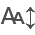

In [2]:
# itables settings
# https://mwouts.github.io/itables/advanced_parameters.html
init_notebook_mode(all_interactive=True)
opt.column_filters = "footer"

# pyalax settings
# documentation: # https://github.com/J535D165/pyalex
pyalexconfig.email = "mail@example.com"

In [3]:
ROR_ID = "031bsb921"
TIME_SPAN = "2018-2022"

In [4]:
org = Institutions()["https://ror.org/" + ROR_ID]
openalex_org_id = org["id"]

In [5]:
pager = Works() \
    .filter(authorships={"institutions": {"ror": ROR_ID}}) \
    .filter(publication_year=TIME_SPAN) \
    .filter(sustainable_development_goals={"id": "1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17"}) \
    .paginate(per_page=200)

alignments = []
for page in pager:
    print("Adding next", len(page), "publications")
    for publication in page:
        for sdg in publication['sustainable_development_goals']:
            alignments.append({'id': publication['id'],
                               'title': publication['title'],
                               'sdg': 'SDG ' + sdg['id'].split("/")[-1] + ': ' + sdg['display_name'],
                               'score': float(sdg['score'])})
#print(alignments)
sorted_alignments = sorted(alignments, key=lambda item: float(item['score']), reverse=True)

df = pd.DataFrame.from_dict(sorted_alignments)
show(df, classes="display")

Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 200 publications
Adding next 136 publications
Adding next 0 publications


In [6]:
dff = df[df.score>0.4]
dff.groupby(['sdg'])['sdg'].count().sort_values(ascending=False)

sdg
SDG 3: Good health and well-being                  622
SDG 16: Peace, justice, and strong institutions    501
SDG 10: Reduced inequalities                       493
SDG 8: Decent work and economic growth             484
SDG 4: Quality education                           464
SDG 9: Industry, innovation and infrastructure     190
SDG 17: Partnerships for the goals                 186
SDG 5: Gender equality                             145
SDG 1: No poverty                                  107
SDG 2: Zero hunger                                  69
SDG 11: Sustainable cities and communities          68
SDG 7: Affordable and clean energy                  68
SDG 13: Climate action                              49
SDG 15: Life on land                                41
SDG 12: Responsible consumption and production      14
SDG 6: Clean water and sanitation                   12
SDG 14: Life below water                             7
Name: sdg, dtype: int64